<a href="https://colab.research.google.com/github/Dayannat0954/Parcial_2/blob/main/Segundo_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Unidade da Federação,Tipo de inspeção,Trimestre,Valor,Ano
0,Pará,NaN,Trimestre x Referência temporal x Tipo de reba...,32530.0,2000
1,Pará,NaN,2º trimestre 2000,30729.0,2000
2,Pará,NaN,3º trimestre 2000,29670.0,2000
3,Pará,NaN,4º trimestre 2000,28640.0,2000
4,Pará,NaN,1º trimestre 2001,33379.0,2001


,Valor
Ano,
2000,121569.0
2001,136641.0
2002,135885.0
2003,172187.0
2004,200844.0
2005,219442.0
2006,270381.0
2007,332330.0
2008,353945.0


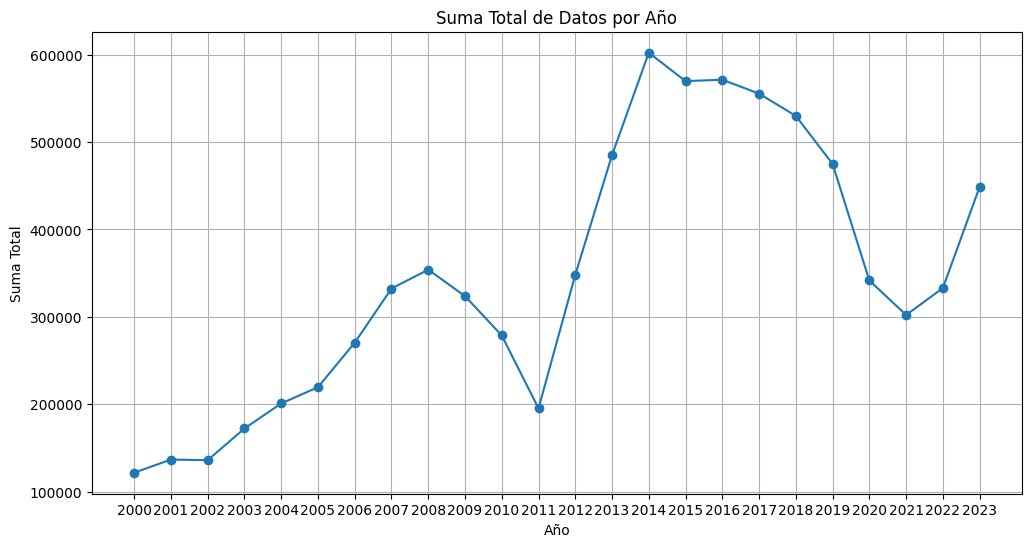

La tabla vertical se ha guardado correctamente en: /content/drive/MyDrive/Ciencia de datos Dayanna/Corte 2/Parcial 2do Corte/datos_verticales.xlsx
La tabla con la sumatoria por año se ha guardado correctamente en: /content/drive/MyDrive/Ciencia de datos Dayanna/Corte 2/Parcial 2do Corte/sumatoria_por_año.xlsx


In [9]:
import pandas as pd

file_path = "/content/drive/MyDrive/Ciencia de datos Dayanna/Corte 2/Parcial 2do Corte/Datos_sucios.xlsx"
df = pd.read_excel(file_path)
# Let's create a clean header from row 2.
header_row = df.iloc[1].fillna('') + ' - ' + df.iloc[2].fillna('')
header_row = header_row.str.strip(' -')
df.columns = header_row

# Now, let's drop the rows that were part of the old header and metadata (rows 0-4 and row 6)
df_cleaned = df.drop([0, 1, 2, 3, 4, 6]).reset_index(drop=True)

# The identifier columns are the first two. Let's rename them.
df_cleaned = df_cleaned.rename(columns={df_cleaned.columns[0]: 'Unidade da Federação', df_cleaned.columns[1]: 'Tipo de inspeção'})

# Now, identify the columns to melt. These are all columns except the first two.
id_vars = ['Unidade da Federação', 'Tipo de inspeção']
value_vars = [col for col in df_cleaned.columns if col not in id_vars]

# Melt the DataFrame
df_melted = df_cleaned.melt(id_vars=id_vars, value_vars=value_vars, var_name='Trimestre', value_name='Valor')

# Extract the year from the 'Trimestre' column
df_melted['Ano'] = df_melted['Trimestre'].str.extract(r'(\d{4})')

# Convert 'Valor' to numeric, coercing errors
df_melted['Valor'] = pd.to_numeric(df_melted['Valor'], errors='coerce')

# Display the first few rows of the transformed DataFrame
display(df_melted.head())
total_por_año = df_melted.groupby('Ano')['Valor'].sum()
display(total_por_año)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(total_por_año.index, total_por_año.values, marker='o')
plt.title('Suma Total de Datos por Año')
plt.xlabel('Año')
plt.ylabel('Suma Total')
plt.xticks(total_por_año.index)
plt.grid(True)
plt.show()
output_path = "/content/drive/MyDrive/Ciencia de datos Dayanna/Corte 2/Parcial 2do Corte/datos_verticales.xlsx"
df_melted.to_excel(output_path, index=False)

print(f"La tabla vertical se ha guardado correctamente en: {output_path}")
output_path_sum_by_year = "/content/drive/MyDrive/Ciencia de datos Dayanna/Corte 2/Parcial 2do Corte/sumatoria_por_año.xlsx"
total_por_año.to_excel(output_path_sum_by_year)

print(f"La tabla con la sumatoria por año se ha guardado correctamente en: {output_path_sum_by_year}")
